In [1]:
###now try to use keras to train the model
###try deep learning 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random
import nltk.classify.util
from gensim.models import FastText
from gensim.models import FastText
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import PredefinedSplit
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
import tensorflow as tf
import keras
import pickle
import sklearn
import sys
import datetime
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
import gensim 
from nltk.stem.snowball import SnowballStemmer
import statistics
from gensim.models import Word2Vec
from nltk.tokenize import RegexpTokenizer
print("sklearn version:",sklearn.__version__)
print("keras version:",keras.__version__)
print("tensorflow version:",tf.__version__)
print("pandas version:",pd.__version__)
print("numpy version:",np.__version__)
print("python version:",sys.version)

sklearn version: 0.20.2
keras version: 2.2.4
tensorflow version: 2.0.0-dev20190314
pandas version: 0.23.4
numpy version: 1.15.1
python version: 3.6.7 |Anaconda custom (64-bit)| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


Using TensorFlow backend.


In [104]:
tokenizer = RegexpTokenizer(r'\w{3,}')
def simple_cleaning(test_str):
    test_str = re.sub(r"\n", " ", test_str, 0, re.MULTILINE)
    test_str = re.sub(r"(\$+)(?:(?!\1)[\s\S])*\1", "", test_str, 0, re.MULTILINE)
    test_str = re.sub(r"-", " ", test_str, 0, re.MULTILINE)
    test_str = re.sub(r"[\\'/{}\":\(\).,]", "", test_str, 0, re.MULTILINE)
    test_str = test_str.lower()
    return test_str.lower()


In [2]:
df=pd.read_csv("complete_math_arxiv.csv")

/Users/ben/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,abstract,authors,categories,created,id,title,updated,clean_abstract,math.MP,...,math.SG,math.SP,math.CT,math.KT,math.GN,math.GM,math.HO,simple_abstract,list_simple_abstract,simple_text
0,0,We construct a generic extension in which the ...,"['Thomas Jech', 'Saharon Shelah']",['math.LO'],1989-04-14,math/9201239,A note on canonical functions,1989-04-14,construct gener extens aleph canon function al...,0,...,0,0,0,0,0,0,0,construct generic exten canon function exist,"['construct', 'generic', 'exten', 'canon', 'fu...",construct generic extens aleph_2 canon functio...
1,1,It is shown that if $C$ is an $n$-dimensional ...,['Keith Ball'],"['math.MG', 'math.FA']",1989-10-26,math/9201205,Volume ratios and a reverse isoperimetric ineq...,1989-10-26,shown dimension convex bodi affin imag larger ...,0,...,0,0,0,0,0,0,0,shown dimens convex bodi affin imag larger cor...,"['shown', 'dimens', 'convex', 'bodi', 'affin',...",shown dimension convex bodi affin imag larger ...
2,2,It is proved that if $C$ is a convex body in $...,['Keith Ball'],"['math.MG', 'math.FA']",1989-10-26,math/9201204,Shadows of convex bodies,1989-10-26,prove convex bodi affin imag zero volum codime...,0,...,0,0,0,0,0,0,0,prove convex bodi affin imag non zero volum co...,"['prove', 'convex', 'bodi', 'affin', 'imag', '...",prove convex bodi affin imag non zero volum co...
3,3,"It is proved that if $u_1,\ldots, u_n$ are vec...","['Keith Ball', 'Alain Pajor']","['math.MG', 'math.FA']",1989-10-26,math/9201203,Convex bodies with few faces,1989-10-26,prove vector volum symmetr convex bodi whose b...,0,...,0,0,0,0,0,0,0,prove vector volum symmetr convex bodi whose b...,"['prove', 'vector', 'volum', 'symmetr', 'conve...",prove vector volum symmetr convex bodi whose b...
4,4,"This note deals with the following problem, th...","['Gideon Schechtman', 'Joel Zinn']","['math.FA', 'math.MG']",1989-11-09,math/9201206,On the volume of the intersection of two $L_p^...,1989-11-09,note deal follow problem case introduc vitali ...,0,...,0,0,0,0,0,0,0,note deal follow problem case introduc vitali ...,"['note', 'deal', 'follow', 'problem', 'case', ...",note deal follow problem case introduc vitali ...


In [105]:
df['simple_abstract']=df['abstract'].apply(lambda x:simple_cleaning(x))

## let we prepare the list of sent, each sent is a list of words
## we will just skip stopwords and any words less than length 3
###  use snowballstemmer to further clean the tokens

In [226]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
tokenizer_regex = RegexpTokenizer(r'\w{3,}')
df['list_simple_abstract']=df['simple_abstract'].apply(lambda x: tokenizer_regex.tokenize(x))
from nltk.corpus import stopwords
STOPS=set(stopwords.words('english'))
df['list_simple_abstract'] = df['list_simple_abstract'].apply(lambda x : [stemmer.stem(y.strip()) for y in x if y not in STOPS])
df['list_simple_abstract'] = df['list_simple_abstract'].apply(lambda x : [stemmer.stem(y.strip()) for y in x if (y not in STOPS) and (len(re.compile(r'\d').findall(y))==0)])

In [247]:
df['simple_abstract']=df['list_simple_abstract'].apply(lambda x :" ".join(x))

In [ ]:
df=df[df['simple_abstract'].apply(lambda x:type(x)==type("aaaa"))]
df['list_simple_abstract']=df['simple_abstract'].apply(lambda x: RegexpTokenizer(r'\w{3,}').tokenize(x))

In [5]:
#####Preprocess
def list_of_authors(text):
    names=[]
    name_list=text.split(',')
    for name in name_list:
        name=name.strip()
        if name[0]=='[':
            name=name[1:]
        if name[-1]==']':
            name=name[:-1]
        name=name[1:-1]
        names+=[name]
    return names    


def list_of_categories(text):
    pat=re.compile(r'math.[A-Z][A-Z]')
    return pat.findall(text)

df['categories']=df['categories'].apply(lambda x: list_of_categories(x))
df['authors']=df['authors'].apply(lambda x: list_of_authors(x))
df['created']=df['created'].apply(lambda x:datetime.datetime.strptime(x, "%Y-%m-%d"))
if "clean_abstract" not in df.columns:
    df['clean_abstract']=df['abstract'].apply(lambda x: clean.transform(x))
      
all_cat={}
for i in df.index:
    paper_cats=df.loc[i,"categories"]
    for cat in paper_cats:
        if cat in all_cat:
            all_cat[cat]+=1
        else:
            all_cat[cat]=1

list_of_all_cat=sorted(list(all_cat.items()),key=lambda x: x[1], reverse=True)            
all_cats=list(zip(*list_of_all_cat))[0]
index_to_cat={}
for i in range(len(all_cats)):
    index_to_cat[i]=all_cats[i]    

for i in range(len(index_to_cat)):
    df[index_to_cat[i]]=df["categories"].apply(lambda x: 1 if index_to_cat[i] in x else 0)

      
###make 

df=df[df['clean_abstract'].apply(lambda x : type(x)!=type(3.0))]
df=df[df['categories'].apply(lambda x : len(x)>0)]    
df=df.reset_index().drop(columns=['index'])

In [14]:
#pat=re.compile(r'\'(\w+)\'')
#df['list_simple_abstract']=df['list_simple_abstract'].apply(lambda x: pat.findall(x))

In [11]:
train=df[df['created']<=datetime.datetime(year=2017,month=1,day=1)]
valid=df[(df['created']<datetime.datetime(year=2018,month=1,day=1))&(df['created']>datetime.datetime(year=2017,month=1,day=1))]
test=df[df['created']>=datetime.datetime(year=2018,month=1,day=1)]

# FastText
### Now we can try FastText
### One cool thing about FastText is that it doesn't require us to see the wrod before.
### Now we can directly process each input text as a matrix of the form (max_len,max_features), where max_len is the padded sequence length and max_features is the dim of embedding matrix of fasttext

In [18]:
from gensim.models import FastText
max_feature= 100
model_ted = FastText(list(df['list_simple_abstract']), size=max_feature, window=5, min_count=3, workers=4,sg=1)

In [19]:
model_ted.save("FastText100.model")

In [20]:
model_ted = FastText.load("FastText100.model")

In [21]:
word_counts = list(model_ted.wv.vocab)

In [22]:
all_words=[]
for i in df.index:
    all_words+=df.loc[i,'list_simple_abstract']
all_words=set(all_words)    

In [23]:
max_feature= 100

big_embedding=np.zeros(shape=(len(all_words),max_feature))

In [24]:
max_len = 200
def embedding_fasttext(list_words,max_len,max_features):
    mat=np.zeros(shape=(max_len,max_features))
    temp_list_words=[]
    for x in list_words:
        if x.strip() in model_ted.wv:
            temp_list_words+=[x.strip()]
    list_words=temp_list_words
    
    if len(list_words)>=200:
        for i in range(200):
            mat[i,:]=model_ted.wv[list_words[i]]
    else:
        length=len(list_words)
        for i in range(200-length,200):
            mat[i,:]=model_ted.wv[list_words[i-(200-length)]]
    return mat        

In [25]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(list(df['simple_abstract']))

In [28]:
def build_embedding():
    embedding=np.zeros(shape=(len(tokenizer.word_index)+1,100))
    for word,index in tokenizer.word_index.items():
        if word in model_ted.wv:
            embedding[index,]=model_ted.wv[word]
    return embedding

In [29]:
embedding_matrix = build_embedding()

#### now we can train the model

In [30]:
train=df[df['created']<=datetime.datetime(year=2017,month=1,day=1)]
valid=df[(df['created']<datetime.datetime(year=2018,month=1,day=1))&(df['created']>datetime.datetime(year=2017,month=1,day=1))]
test=df[df['created']>=datetime.datetime(year=2018,month=1,day=1)]
print(len(train))
print(len(valid))
print(len(test))
list_tokenized_train = tokenizer.texts_to_sequences(train['simple_abstract'])
list_tokenized_valid = tokenizer.texts_to_sequences(valid['simple_abstract'])
list_tokenized_test = tokenizer.texts_to_sequences(test['simple_abstract'])

314423
37049
36338


In [31]:
embedding_matrix.shape

(134544, 100)

(array([9.11450e+04, 1.57326e+05, 8.42340e+04, 3.67780e+04, 1.41540e+04,
        4.05600e+03, 9.50000e+01, 1.30000e+01, 5.00000e+00, 4.00000e+00]),
 array([  1. ,  31.8,  62.6,  93.4, 124.2, 155. , 185.8, 216.6, 247.4,
        278.2, 309. ]),
 <a list of 10 Patch objects>)

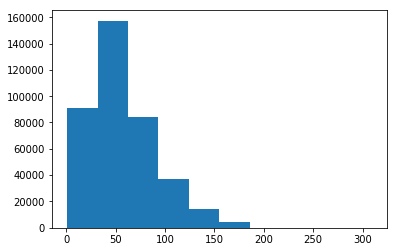

In [32]:
all_lengths=list(df['list_simple_abstract'].apply(lambda x:len(x)))
plt.hist(all_lengths)

## choose the padding length to be 200

In [33]:
maxlen = 200
X_train = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_valid = pad_sequences(list_tokenized_valid, maxlen=maxlen)
X_test = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [62]:
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import SpatialDropout1D,Input
from keras.layers import GRU,GlobalAveragePooling1D,GlobalMaxPooling1D,Conv1D,concatenate
num_class=len(index_to_cat)
inp = tf.keras.layers.Input(shape=(200, ))
###then do embedding
embed_size = 100
max_features = embedding_matrix.shape[0]
x = tf.keras.layers.Embedding(max_features, embed_size,weights=[embedding_matrix],trainable=True)(inp)


### then do LSTM
x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(50,name='LSTM_layer',return_sequences=True))(x)
### 1D conv
#x = Conv1D(256, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(x)

x = tf.keras.layers.GlobalMaxPooling1D()(x)

### maxpool
#x = GlobalMaxPool1D()(x)
### batchnor
#x = BatchNormalization()(x)
#x = Dense(128, activation="relu")(x)

### dropout
#x = Dropout(0.1)(x)
### relu
x = tf.keras.layers.Dense(64, activation="relu")(x)
### dropout
x = tf.keras.layers.Dropout(0.1)(x)
###
#x = BatchNormalization()(x)
x = tf.keras.layers.Dense(num_class , activation="softmax")(x)

In [63]:
model = tf.keras.Model(inputs=inp, outputs=x)
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['categorical_accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 200, 100)          13454400  
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200, 100)          45600     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                6464      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080

In [54]:
cat_to_index={}
for i in range(len(index_to_cat)):
    cat_to_index[index_to_cat[i]]=i

In [55]:
def make_one_hot(row):
    temp=[0]*len(index_to_cat)
    ind=cat_to_index[row['categories'][0]]
    temp[ind]=1
    return temp

In [56]:
y_train = train.apply(lambda row:make_one_hot(row),axis=1)
y_train = np.array(list(y_train))
y_valid = valid.apply(lambda row:make_one_hot(row),axis=1)
y_valid = np.array(list(y_valid))
y_test = test.apply(lambda row:make_one_hot(row),axis=1)
y_test = np.array(list(y_test))

In [65]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import os
cwd = os.getcwd()
batch_size = 64
epochs = 6
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=cwd+"/weaken_fasttext100_embedding_max_pool_biGRU.h5", verbose=1, save_best_only=True)
history = model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_valid, y_valid),callbacks=[checkpointer])

Train on 314423 samples, validate on 37049 samples
Epoch 1/6
314368/314423 [============================>.] - ETA: 0s - loss: 1.3068 - categorical_accuracy: 0.6211
Epoch 00001: val_loss improved from inf to 0.96899, saving model to /Users/ben/Documents/NLP project/weaken_fasttext200_embedding_max_pool_biGRU.h5
314423/314423 [==============================] - 2126s 7ms/sample - loss: 1.3068 - categorical_accuracy: 0.6211 - val_loss: 0.9690 - val_categorical_accuracy: 0.7097
Epoch 2/6
314368/314423 [============================>.] - ETA: 0s - loss: 0.9300 - categorical_accuracy: 0.7205
Epoch 00002: val_loss improved from 0.96899 to 0.93017, saving model to /Users/ben/Documents/NLP project/weaken_fasttext200_embedding_max_pool_biGRU.h5
314423/314423 [==============================] - 2119s 7ms/sample - loss: 0.9300 - categorical_accuracy: 0.7206 - val_loss: 0.9302 - val_categorical_accuracy: 0.7203
Epoch 3/6
314368/314423 [============================>.] - ETA: 0s - loss: 0.7846 - categor

In [66]:
_, train_acc = model.evaluate(X_train, y_train, verbose=1)
_, test_acc = model.evaluate(X_valid, y_valid, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history


37049/37049 [==============================] - 117s 3ms/sample - loss: 1.1657 - categorical_accuracy: 0.7040
Train: 0.891, Test: 0.704


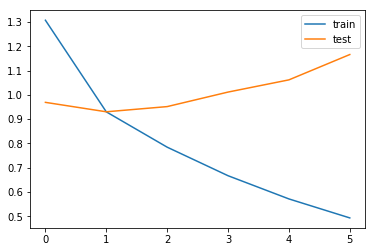

In [69]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [67]:
from keras.models import load_model
model=tf.keras.models.load_model('weaken_fasttext100_embedding_max_pool_biGRU.h5')

In [68]:
_, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(test_acc)

36338/36338 [==============================] - 91s 2ms/sample - loss: 0.9274 - categorical_accuracy: 0.7181
0.71814626


In [70]:

y_pred=model.predict(X_test)

In [71]:
y_pred2=y_pred.argmax(axis=1)

In [72]:
y_true2=y_test.argmax(axis=1)

In [73]:
f1_score(y_true2, y_pred2, average='macro')  

0.6269910358905622

In [74]:

list(zip([index_to_cat[i] for i in range(32)],f1_score(y_true2, y_pred2, average=None)  ))

[('math.MP', 0.6206398845321145),
 ('math.CO', 0.7962264150943397),
 ('math.AG', 0.7506603275224512),
 ('math.PR', 0.7414500683994528),
 ('math.AP', 0.7871287128712872),
 ('math.DG', 0.7248110831234256),
 ('math.IT', 0.8652959943282524),
 ('math.NT', 0.7637603507062835),
 ('math.DS', 0.6398820493918171),
 ('math.OC', 0.7787934186471663),
 ('math.FA', 0.6100449162923642),
 ('math.RT', 0.6347452424800492),
 ('math.NA', 0.7937655297040885),
 ('math.GT', 0.7062841530054644),
 ('math.QA', 0.49629629629629635),
 ('math.CA', 0.47926763597199784),
 ('math.GR', 0.6877828054298643),
 ('math.ST', 0.730072463768116),
 ('math.RA', 0.5474254742547425),
 ('math.CV', 0.5925215723873442),
 ('math.AT', 0.6077457795431976),
 ('math.OA', 0.6379542395693135),
 ('math.AC', 0.6836616454229432),
 ('math.LO', 0.749611197511664),
 ('math.MG', 0.4801223241590214),
 ('math.SG', 0.6590909090909091),
 ('math.SP', 0.4155339805825243),
 ('math.CT', 0.6421663442940039),
 ('math.KT', 0.3303571428571429),
 ('math.GN', 0

In [75]:
f1_score(y_true2, y_pred2, average="weighted")  

0.7166141608582824

In [76]:
f1_score(y_true2, y_pred2, average="micro")  

0.7181462931366613

In [77]:
accuracy_score(y_true2,y_pred2)

0.7181462931366613

In [89]:
from sklearn.metrics import classification_report, confusion_matrix
np.set_printoptions(threshold=np.inf)

print(confusion_matrix(y_true2, y_pred2))

[[1290   19   18   83   77   61   15   11   25   10    7    6   14    8
    47   28    1    1    0    2    0   12    0    5    0    1   25    1
     0    0    0    2]
 [  31 2532   37   77    1    4   62  150    8   20    7   34    8   31
    18   19   34   12   11    2   10    1   10   18   28    0    6    5
     1    0    4    7]
 [  26   41 1421    1    1   33    3  142    6    7    2   38    6   10
    16    8    5    0   11   15   26    1   41    2    1    7    1   10
    11    0    0    1]
 [ 118   67    0 1897   41    3   45   10   35   60   16    0   28    1
     0   13    1  120    1    9    3    6    0    2    3    0    3    1
     0    2    0    0]
 [ 220    7    4  110 2544   98    3    3   39   67   35    0  114    0
     0   75    0    3    0   15    0    0    0    1    7    0   43    0
     0    0    0    2]
 [  73    6   47    5   47 1151    3    3   18   12    6    6    6   34
     8    7    5    1    1   23   12    2    0    1   21   20    8    3
     0    1    0    0

In [78]:

acc=0
bad=[]
for i in range(len(y_true2)):
    if (y_true2[i]==y_pred2[i]):
        
        acc+=1
    else:
        bad+=[i]

In [79]:
test=test.reset_index()
bad_cat={}

for index in bad:
    cat=test.loc[index,"categories"][0]
    if cat in bad_cat:
        bad_cat[cat]+=[index]
    else:
        bad_cat[cat]=[index]

In [94]:
temp=bad[random.randint(0,len(bad))]
print(temp)
print(test.loc[temp,"simple_abstract"])
print(test.loc[temp,"categories"])
print(index_to_cat[y_pred[temp].argmax()])
temp2=[]
count=0
for ind in y_pred[temp].argsort()[::-1]:
    if count>3:
        break
    temp2+=[(index_to_cat[ind],y_pred[temp][ind])]
    count+=1
print(temp2)    
print((y_pred[temp]*100).astype(int))

932
consid reconstruct heterogen coeffici field robin boundari condit inaccess part boundari poisson problem uncertain unknown inhomogen conduct field interior domain account model error stem uncertainti conduct coeffici treat unknown conduct nuisanc paramet carri approxim premargin invert robin coeffici field approxim relat model error via bayesian approxim error bae approach uncertainti analysi present reli local linear paramet observ map maximum posteriori map estim lead normal gaussian approxim paramet posterior densiti comput map point appli inexact newton conjug gradient approach base adjoint methodolog construct covari made tractabl invok low rank approxim data misfit compon hessian two numer experi consid one prior covari conduct isotrop one prior covari conduct anisotrop result compar base standard error model particular emphasi feasibl posterior uncertainti estim show bae approach feasibl one sen predict posterior uncertainti consist actual estim error neglect relat model err